# **CHURNCOMPASS: NAVIGATING CUSTOMER RETENTION IN TELCOM**

### Project by: Deborah Okeyo

# 1.Introduction

In today's highly competitive telecommunications industry, customer retention is important for sustained business success. Losing customers (churn), can lead to significant revenue losses, making it essential for telecom companies to proactively identify customers at risk of leaving. This project will focus on developing a predictive model to forecast customer churn by analyzing customer data and identifying key factors that contribute to churn, it will also aim to equip the company with insights to improve customer retention strategies

# 1.1 Business Problem

The objective of this project is to predict whether a customer will churn (leave the service) in the near future. This will inturn allow the company to intervene with targeted retention efforts and potentially saving revenue. Through understanding the patterns and reasons behind customer churn the company will get insights on how to improve their pricing, services and customer support.

# 1.2 Data Understanding

The dataset used for this analysis contains customer information, such as demographics, account information, and service usage patterns. Key features include tenure, contract type, payment method, monthly charges, and various service-related variables. The target variable is a binary outcome indicating whether the customer has churned or not.

# 2. Importing Libraries

In [4]:
# Import necessary libraries
import pandas as pd

# 2.1 Loading the Data

To begin our analysis, we first need to load the dataset. We will use this data to explore patterns and build a predictive model for customer churn.

In [5]:
# Load the dataset
data_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'  
df = pd.read_csv(data_path)

# Display the first few to confirm it's loaded correctly
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2.2 Initial Data Exploration

Here, the objective is to understand the structure and content of the dataset.
The tasks are:

1.Checking the shape (number of rows and columns).

2.Data types of each column.

3.Look for any missing values or duplicates.



In [6]:
# Check the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Display the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


The dataset contains 7043 rows and 21 columns.

Data types of each column:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Strea

There are no misssing values

# 2.3 Exploratory Data Analysis

Getting an overview of the numerical features

In [7]:
print("\nSummary statistics of numerical columns:")
print(df.describe())



Summary statistics of numerical columns:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [8]:
print("\nDistribution of target variable 'Churn':")
print(df['Churn'].value_counts())



Distribution of target variable 'Churn':
Churn
No     5174
Yes    1869
Name: count, dtype: int64


This indicates that there is an imbalance in the dataset, with a higher number of customers not churning compared to those who do. Addressing this imbalance will be important for building a robust model.

# 3. Data Preprocessing

Here, we will encode the categorical variables and split the dataset into features and target variables. We'll use 'SMOTE' to handle the imbalance in the target variable.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Define the feature columns and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# List of categorical columns to encode
categorical_features = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod'
]

# List of numerical columns
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Preprocessor for the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numerical_features)
    ]
)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Define a pipeline with preprocessing and SMOTE
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smote)
])

# Preprocess the features and handle class imbalance
X_resampled, y_resampled = pipeline.fit_resample(X, y)


# 3.1 Splitting the data

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set target distribution:\n{y_train.value_counts()}")
print(f"Testing set target distribution:\n{y_test.value_counts()}")


Training set shape: (8278, 29)
Testing set shape: (2070, 29)
Training set target distribution:
Churn
No     4153
Yes    4125
Name: count, dtype: int64
Testing set target distribution:
Churn
Yes    1049
No     1021
Name: count, dtype: int64


# 3.2 Fitting a Model

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are already defined

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression model
model = LogisticRegression(class_weight='balanced')
model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced')

# 3.3 Evaluating the model

In [21]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[759 262]
 [173 876]]

Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.74      0.78      1021
         Yes       0.77      0.84      0.80      1049

    accuracy                           0.79      2070
   macro avg       0.79      0.79      0.79      2070
weighted avg       0.79      0.79      0.79      2070



From the output above:

Accuracy: 79% - The model predictedcorrectly the churn status 79% of the time.
Precision (Yes): 77% - Of all the predicted churn cases, 77% were actual churns.
Recall (Yes): 84% - Of all the actual churn cases, 84% were correctly predicted by the model.
F1-Score (Yes): 80% - The harmonic mean of precision and recall for churn cases.
Precision (No): 81% - Of all the predicted non-churn cases, 81% were actual non-churns.
Recall (No): 74% - Of all the actual non-churn cases, 74% were correctly predicted by the model.
F1-Score (No): 78% - The harmonic mean of precision and recall for non-churn cases.

The logistic regression model performs well with a good balance between precision and recall for predicting customer churn. However,further tuning and exploration might improve these results.

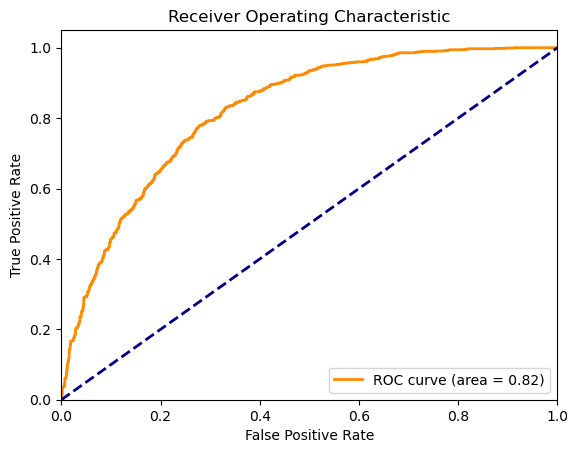

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label='Yes')
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


From the ROC curve above, The model has high sensitivity and low FPR, meaning it performs well in distinguishing between the positive and negative classes. An AUC of 0.82 means that the model has a strong ability to distinguish between the positive class ( churn) and the negative class (no churn)

# 4. Feature Importance Analysis

Here we will focus on understanding which features are most influential in making predictions and how individual features affect the model's output.